# <font color="dodgerblue"> A model built to test inflation </font>

### 1. First, we want to import some of the key factors to all of the inflation. Here are some inputs we are accounting for:
* Aggregate supply and Aggregate Demand seem to be handled by the GDP
* We also have data on the M1 which should signify the free flow of money in the economy
* Then there is the workforce data that was downloaded
* Look at first importing all of the CSVs and then merge those together in one tensor

<font color="gold">#### Note because Google Colab is cloud based, you need to run some of what is mentioned here in order to upload .csv files to the cloud:</font>
* https://saturncloud.io/blog/uploading-local-files-using-google-colab/


In [ ]:
import torch
import pandas as pd
import os
from google.colab import files as fls
if os.path.isfile("CPI_Categories_2013.csv") and os.path.isfile("GDP_monthly_2013.csv") and os.path.isfile("JTSJOL_2013.csv") and os.path.isfile("M1_data_2013.csv"):
  print("All required files present")
else:
  fls.upload()



Saving CPI_Categories_2013.csv to CPI_Categories_2013 (1).csv
Saving GDP_Monthly_2013.csv to GDP_Monthly_2013 (1).csv
Saving JTSJOL_2013.csv to JTSJOL_2013 (1).csv
Saving M1_data_2013.csv to M1_data_2013 (1).csv


### Then, notice that you use the pandas.read_csv() command from there.
<font color="gold">*I attempted to specify the types of data coming into the dataframes, but learned that the first column seems to persist as an "object" type. Another interesting issue was in trying to loop through the dataframes, I was able to transpose those within the loop, but they didn't persist there either. Therefore, I needed to transpose them one by one*</font>

Merge the independent files into a dataframe
Then, you need to convert those over to PyTorch tensors.

You can now use torch to begin the machine learning using the nueral networking in Torch.

In [ ]:
import string
#Import the datetime so we can convert all dates to the right format
from datetime import datetime
#Reading in the files
CPI = pd.read_csv('/content/CPI_Categories_2013.csv',
                  header = None,
                  index_col = False,
                  dtype={0:str, 'Trend_CPI': float})
Flowing_Cash = pd.read_csv('/content/M1_data_2013.csv',
                           header = None,
                           index_col = False,
                           dtype={0:str,
                                  'Trend_Cash': float})
Open_positions = pd.read_csv('/content/JTSJOL_2013.csv',
                             header = None,
                             index_col = False,
                             dtype={0:str, 'Trend_Work':float})
GDP = pd.read_csv('/content/GDP_Monthly_2013.csv',
                  header = None,
                  index_col = False,
                  dtype={0:str, 'Trend_GDP':float})
# print(f"CPI: {CPI.columns} | Cash: {Flowing_Cash.columns} | Demand: {Open_positions.columns} | GDP: {GDP.columns}") #This showed we need to transpose

Flowing_Cash = Flowing_Cash.T
Open_positions = Open_positions.T
GDP = GDP.T
CPI = CPI.T

Flowing_Cash.columns =['Month','Trend_Cash']
Open_positions.columns =['Month','Trend_Work']
GDP.columns=['Month','Trend_GDP']
CPI.columns =['Month', 'Trend_CPI']


Flowing_Cash = Flowing_Cash.astype({'Month':'string','Trend_Cash':float})
Open_positions = Open_positions.astype({'Month':'string','Trend_Work':float})
GDP = GDP.astype({'Month':'string','Trend_GDP':float})
CPI = CPI.astype({'Month':'string','Trend_CPI':float})
#This was a chekc to make sure all months started from may 2013 and had the same length.
# Flowing_Cash.head(10), Open_positions.head(10), GDP.head(10), CPI.head(10), len(Flowing_Cash),len(Open_positions),len(CPI),len(GDP)



# This was for an older categorized dataset.
#Give column names for referencing
#Flowing_Cash.columns =['Month','Above 70% FC','Trend_Cash']
# Open_positions.columns =['Month','Above 70% OP','Trend_Work']
# GDP.columns=['Month','Above 70% GDP','Trend_GDP']

# CPI.columns =['Month','Above 70% CPI', 'Trend_CPI']


### Right now we can't merge because the columns don't match. So, we are going to take the months for CPI and make sure that they are all the same. *If we don't create an incremented measure of the tick values, then the y-axis will get cluttered as well.*

* Use CPI labeling to make sure all of the datasets have the same labeling
* Then merge them together
* Also create a vector of tick mark values for each y-axis


In [ ]:
import numpy as np

Open_positions['Month']= CPI['Month']
Flowing_Cash['Month'] = CPI['Month']
GDP['Month']= CPI['Month']

#Set up your Inputs matrix
Inputs = pd.merge(Flowing_Cash, Open_positions,on=['Month','Month'])
Inputs = pd.merge(Inputs, GDP, on=['Month','Month'])

#Create vectors of tick marks
CPI_Min, CPI_Max = [CPI['Trend_CPI'].min().astype(float),CPI['Trend_CPI'].max().astype(float)]
CPI_scale = np.arange(CPI_Min,CPI_Max,(CPI_Max-CPI_Min)/10,float)

FC_Min, FC_Max = [Flowing_Cash['Trend_Cash'].min().astype(float),Flowing_Cash['Trend_Cash'].max().astype(float)]
FC_scale = np.arange(FC_Min,FC_Max,(FC_Max-FC_Min)/10,float)

OP_Min, OP_Max = [Open_positions['Trend_Work'].min().astype(float),Open_positions['Trend_Work'].max().astype(float)]
OP_scale = np.arange(OP_Min,OP_Max,(OP_Max-OP_Min)/10,float)

GDP_Min, GDP_Max = [GDP['Trend_GDP'].min().astype(float),GDP['Trend_GDP'].max().astype(float)]
GDP_scale = np.arange(GDP_Min,GDP_Max,(GDP_Max-GDP_Min)/10,float)

Month_scale = []
for i, item in enumerate(CPI['Month']):
  if i % 12 == 0:
    Month_scale.append(item)



### Let's now take a look at our different datasets, and chart them out so we can better evaluate lag times.

* First you want to look at Matplotlib and use a shared axis in order to see where the lags are between the inputs and CPI
* Make sure we can see the months, with enough space between data.


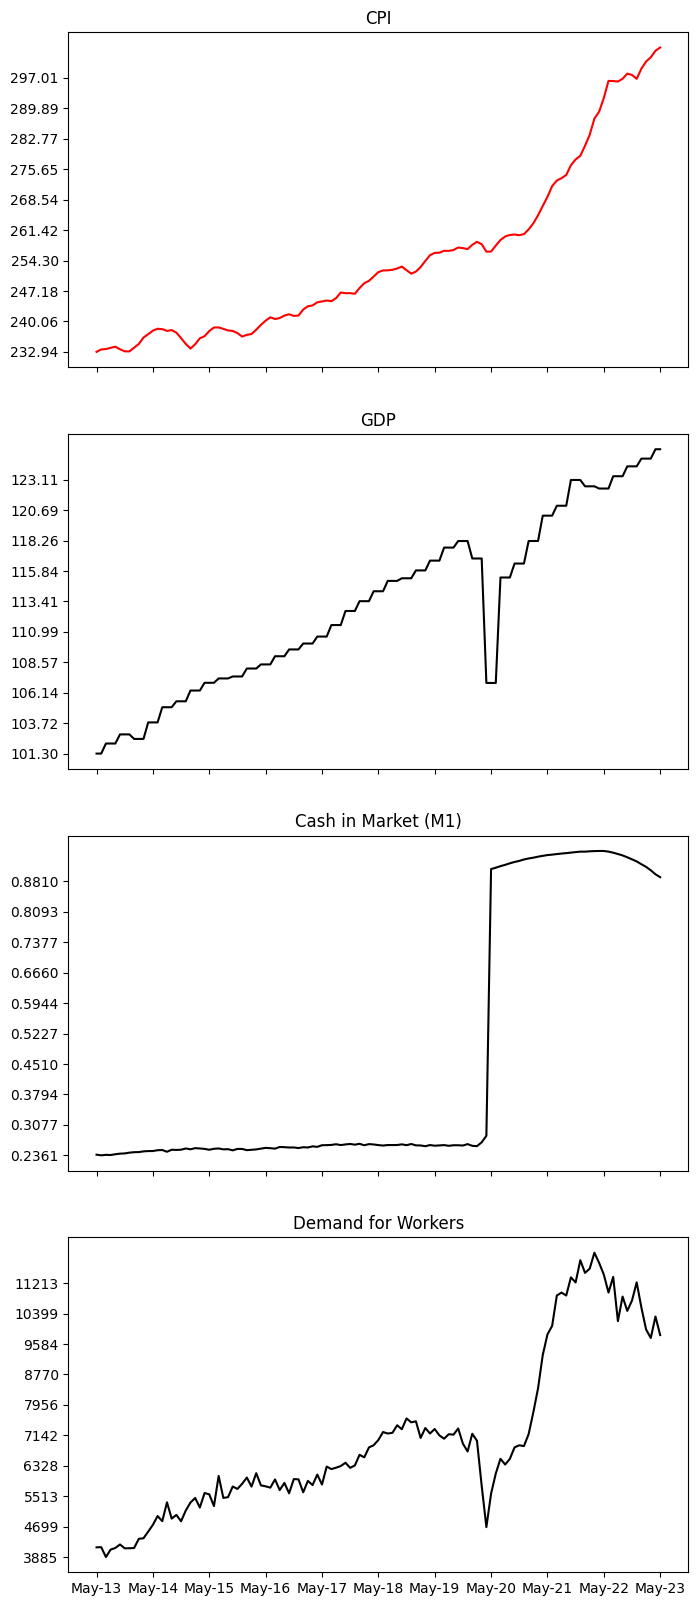

In [ ]:
import matplotlib.pyplot as plt

#Plot out how this looks with enough space to see the differences
fig, axis = plt.subplots(4,1, sharex=True, figsize=(8,20))
axis[0].plot(CPI['Month'],CPI['Trend_CPI'],'r')
axis[0].set_title('CPI')
axis[0].set_yticks(CPI_scale)
axis[0].set_xticks(CPI['Month'])
axis[1].plot(GDP['Month'],GDP['Trend_GDP'],'k')
axis[1].set_title('GDP')
axis[1].set_yticks(GDP_scale)
axis[2].plot(Flowing_Cash['Month'],Flowing_Cash['Trend_Cash'],'k')
axis[2].set_title('Cash in Market (M1)')
axis[2].set_yticks(FC_scale)
axis[3].plot(Open_positions['Month'],Open_positions['Trend_Work'],'k')
axis[3].set_title('Demand for Workers')
axis[3].set_yticks(OP_scale)
axis[3].set_xticks(Month_scale)

### Now that we have plotted the graphs, we need to use them to see what sort of "Lag" there is between variables.

* It makes sense that while the GDP was down, we would see an influence on the CPI *(it took a little while to recover)*
* The free money increase in the market seemed to influence things, but there was one steep curve
* The demand for workers took a brief slump, but then skyrocketed and shortly thereafter took off
* **Most importantly, there was a lag with most of these influences. It might be best to look at a confusion matrix between 2 to 14 months looking at these curves.**

<font size="2" color="gold"> *One quick side note is the GDP data has that huge dip, and it takes a while to recover. It isn't implemented here for consistency sake, but one possible alternative measure here is to run a regresion line through the chart, and create a new dataset based on the residuals from the regression line. This may be done in follow ups to this study.*</font>

In [ ]:
# Create new datasets based on shifting data forward 2 to 12 months (start with GDP, then Flowing_cash, then Open Positions)
lowshift = -5
highshift = 18
GDP_shift = pd.DataFrame(GDP['Trend_GDP'])
for i in range(lowshift,highshift):
  mnth = str(i) + " months"
  GDP_shift[mnth] = GDP['Trend_GDP'].shift(periods = i)

# Now Add the CPI data
GDP_shift['CPI'] = CPI['Trend_CPI']

#Flowing Cash
Flowing_Cash_shift = pd.DataFrame(Flowing_Cash['Trend_Cash'])
for i in range(lowshift,highshift):
  mnth = str(i) + " months"
  Flowing_Cash_shift[mnth] = Flowing_Cash_shift['Trend_Cash'].shift(periods = i)

Flowing_Cash_shift['CPI'] = CPI['Trend_CPI']

Open_positions_shift = pd.DataFrame(Open_positions['Trend_Work'])
for i2 in range(lowshift,highshift):
  mnth = str(i2) + " months"
  Open_positions_shift[mnth] = Open_positions_shift['Trend_Work'].shift(periods = i2)

Open_positions_shift['CPI'] = CPI['Trend_CPI']

# This was just a check to make sure these worked.
# Open_positions_shift.head(25)

### <font color = "blue">**Now let's create a correlation matrix that focusses on the relations of each shift against the CPI**</font>

<font color = "gold">*Keep in mind that we are focusing on getting the strongest correlatoin whether positive or negative to determine the proper lag time.*</font>

<Axes: >

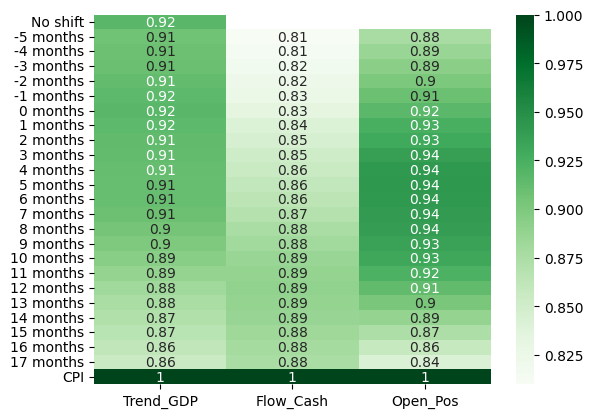

In [ ]:
#Import Seaborn and then use a slice of the colormap
import seaborn as sbn

GDP_corr = GDP_shift.corr()
Flowing_Cash_corr = Flowing_Cash_shift.corr()
Open_positions_shift_corr = Open_positions_shift.corr()

OvrAll_corr = pd.DataFrame(GDP_corr['CPI'])
OvrAll_corr['Flow_Cash'] = Flowing_Cash_corr['CPI']
OvrAll_corr['Open_Pos']=Open_positions_shift_corr['CPI']

OvrAll_corr.rename(columns ={'CPI':'Trend_GDP'}, inplace =True)
OvrAll_corr.rename(index ={'Trend_GDP':'No shift'}, inplace =True)
OvrAll_corr

sbn.heatmap(OvrAll_corr,annot=True, cmap = 'Greens')

### Now we need to make every column numeric and convert into a PyTorch tensor

* Here we could keep the labels just to show the accuracy, but there should be more of the actual number of above average months.
* After we have modified this, there needs to be a cell in place that shows the correlations for each input variable's lag on the actual inflation. Because this is continuous, what we can do is use the bucketed data as a test, but use the regression data to make the predictions.

In [ ]:
inp_lab =[]
out_lab =[]
for i in range(len(Inputs['Month'])):
  inp_lab.append(i)

for j in range(len(CPI['Month'])):
  out_lab.append(j)

#Replace the index of Inputs with the month names.
Inputs = Inputs.rename(index=lambda x:Inputs['Month'][x])

#Replace the index of the CPI with the month names.
CPI = CPI.rename(index =lambda x:CPI['Month'][x])

#Now change the
Inputs['Month']=inp_lab
CPI['Month'] = out_lab
dict = {'COLD':0,'WARM':1,'HOT':2}
out_dict = {'COLD':0,'COOL':1,'WARM':2,'HOT':3}
Inputs = Inputs.replace({"Trend_Cash": dict}).replace({"Trend_Work": dict}).replace({"Trend_GDP":dict})
CPI = CPI.replace({"Trend_CPI":out_dict})
#Streamline Inputs so we only have the categories
inp_sel = ['Month','Trend_Cash','Trend_Work','Trend_GDP']
Inputs_Strmln = Inputs[inp_sel]

#Finally convert to a tensor and note the need for "values"
# See here: https://saturncloud.io/blog/convert-pandas-dataframe-to-pytorch-tensor/
Inputs_tens = torch.tensor(Inputs_Strmln.values, dtype=torch.float32) #Make sure you have the right datatype so X below matches y.

#Make sure that CPI has same length as Inputs as the data for CPI seems to be more recent
CPI = CPI[:len(Inputs_tens)]

#Check to make sure they have the same length
if not len(CPI) == len(Inputs_tens):
  print(f"Here are the inputs:\n {Inputs_tens.shape} \n Here are outputs: \n{CPI.shape} something is off.")
else:
  print(Inputs_tens)

TypeError: ignored

## Need to shuffle the values so that when we perform a test and train split we don't have disproportionate values representing inflation.

* Before doing that, you need to make sure you have the same dimensionality and then horizontally stack these inputs.
* Note for the shuffling here, if you were to look inside the square brackets, you can see the new list of values that are randomly shuffled. Try entering just that torch.randperm() function to have better insight to this shuffling.

In [ ]:
#Now use hstack to combine the outputs with the inputs as we want to shuffle the rows of both
if len(CPI) == len(Inputs_tens):
  yvals = torch.tensor(CPI['Trend_CPI']).unsqueeze(dim=1)
  Inputs_tens = torch.hstack((Inputs_tens,yvals)) #Note the need for double brackets here
  #print(Inputs_tens.shape)

#Here is how we can shuffle the rows using randperm
Inputs_tens=Inputs_tens[torch.randperm(len(Inputs_tens))]
Inputs_tens

# Here I need to create a split of training and testing data also considering that Inputs_Tens is a 2-d matrix

### First portion of the gameplan
* First  we want to make sure we set up 2 tensors, one for the inputs and one for the outputs (the CPI)
* Ok, after doing that, you want to run a definition of a function that does the following:
 * Uses the train()
 * Implements the choosen loss function (see below for the logic of the NLLLoss function) *I don't think we want cross-entropy long term, but for now we are going to go with it*
 * Looks or an optimizer like SGD
 * Sets up the loss_backwards function
 * Puts in the optimizer step
 * Puts in a seqential print out of results in accuracy and loss

* After all of this, you can likely run a matplotlib plot of how it all printed out.

### Second portion of the gameplan
After all of this, you might want to revisit other options to optimize like:

* Increasing the number of data points to say 10 years
* Adjusting the optimzers
* Changing the number of epochs
* Alternating the lr or learning rate
* Perhaps switching to a convolutional neaural network

*A small side note is that we are going to have to look at chapter 3 it seems to figure out how to get the multi-variate inputs in. After that is in place, we should be able to implement what was done in chapter 2.*
** OR perhaps we can use the nn.linear() with a self defined forward function to pass that along. CircleModelV1**

In [ ]:
# A few things we can set up right off the bat are an optimizer, loss function, and an accuracy function but even more our X and y data
# You might in the future want to use train_test_split, but for now keep commented
#from sklearn.model_selection import train_test_split


X = Inputs_tens[:,1:4].squeeze(dim =0)

X.squeeze(dim=1)
print(X.ndim)
y = torch.tensor(Inputs_tens, dtype=torch.float32) #make sure the datatype is the same as with X
# y = torch.tensor(CPI['Trend_CPI'], dtype=torch.float32) #make sure the datatype is the same as with X
print(y.ndim)
#80% of data
train_split = int(0.8*len(X))

#Split the data into train and test sets along the number of rows
X_train, y_train = X[:train_split,:], y[:train_split]
X_test, y_test = X[train_split:len(X),:], y[:-train_split]
# We could also use train_test_split(X,y,test_size = 0.2)

loss_fn = torch.nn.CrossEntropyLoss() #This is a rather simple dataset so it seems a basic loss function works better here.


#Need to set up the parameters of X and y first
#optimizer = torch.optim.SGD()

#Also set up the device
device = "cuda" if torch.cuda.is_available() else "cpu"

X_train.shape, y_train.shape, X_test.shape, y_test.shape

### Now set up an accuracy function


In [ ]:
#Define the accuracy function
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

### Right now the issue seems to be getting the values from a multi-input tensor into the model which you don't see in chapter 1.

We need to look at chapter 2 and look at how to set up multiple inputs (I think features) and match those up in a defined function with a forward pass. It looks a little like because we aren't needing transformations, we can somehow get this into a dataloader and ensure it is on the device. For now, it looks like we want to define a class that shows the transformation of these inputs of size 3 to an output of feature 1. So, it looks like the solution is to set up a class.

* Now set up a basic model (perehaps using linear layers). I believe you will need to come up with an nn.Sequential at some point, but perhaps look at the train() function too?
* Note that because this is more of a probability based multi-class classification, it seems from the reference [here](https://neptune.ai/blog/pytorch-loss-functions) that the best loss function might be the [negative-log-liklihoood loss function](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html#torch.nn.NLLLoss). *However, when looking at the NLLLoss it is explained that for simplicity, we can use the CrossEntropy loss function here.*

In [ ]:
from torch import nn
class infl_model(nn.Module):
  """
  It seems the number of input features should vary based on the input column,
  the hidden units can be modified to improve the model, and the output should be 3 right now
  since we are trying to classify this as cold, warm or hot
  """

  def __init__(self, input_features, output_features, hidden_units = 4):
    super().__init__()
    #Create number of input layers
    self.Lay_1 = nn.Linear(in_features = input_features, out_features = hidden_units)
    self.Lay_2 = nn.Linear(in_features = hidden_units, out_features=hidden_units)
    self.Lay_3 = nn.Linear(in_features = hidden_units, out_features = output_features)

  #Define the forward method
  def forward(self, x):
    return self.Lay_3(self.Lay_2(self.Lay_1(x)))

model_0 = infl_model(input_features=3,
                     output_features=1,
                     hidden_units=5).to(device)
model_0

In [ ]:
print(X_test)

## Turn model's outputs to prediction probabilities, and then labels

*Now it seems we can also set up the optimizer with the parameters from the model.*

In [ ]:
#Set to evaluation mode
model_0.eval()
# X_test = torch.from_numpy(X_test).type(torch.float)
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))

#Set optimizer
optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr=0.05)

#Logits
y_logits[:10]

In [ ]:
# Convert model's logit outputs to prediction probs
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs[:5])

## Now that we have the model set up, it seems worthwhile to set up our prediction variants based on the model

In [ ]:
 # Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test.to(device))

y_preds

## Ok, now it is time to use the model, loss_fn, accuracy function, and optimizer to build a training loop and test

*Note we might want to look a little at logits functions and prediction probabilities here to see if they would serve in better accuracy, or general functionality here.*

In [ ]:
torch.manual_seed(42)

#Set up loop count and track different values as passing through
epochs = 75
epoch_count = []
loss_values = [] #Maybe something here for accuracy and test loss?


# Loop through the data
for epoch in range(epochs):
  #Set up training to require gradients when needed
  model_0.train()